In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
projects = [
    "UX_OPENAI_REFACTOR",
    # "ITBA_NEW_AUTHENTICATION_SERVER",
    # "TADL_RAG_SECRET_PROJECT"
]


In [ ]:
from time import sleep
import requests

# Define server URL (change if not running locally)
SERVER_URL = "http://localhost:8000"  # Update if different

# Report creation loop using API
for project in projects:
    title = f"Report for {project}"
    prompt = "Crear un informe sobre el proyecto."
    files = [project]

    data = {
        "title": title,
        "prompt": prompt,
        "files": files
    }

    try:
        response = requests.post(f"{SERVER_URL}/reports/generate", json=data)
        sleep(120)
        response.raise_for_status()
        print(f"Report created for project: {project}")
    except requests.RequestException as e:
        print(f"Error generating report for {project}: {e}")


Report created for project: UX_OPENAI_REFACTOR


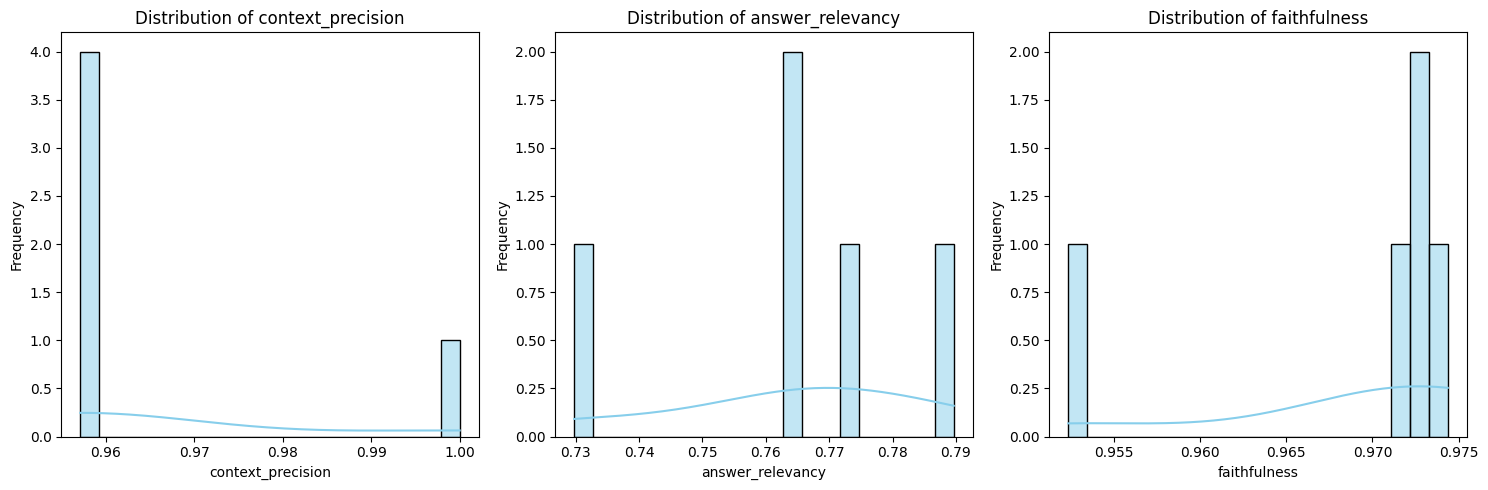

In [11]:
conn = sqlite3.connect('reports.db')

query = """
SELECT context_precision, answer_relevancy, faithfulness
FROM reports
"""
df = pd.read_sql_query(query, conn)

conn.close()

cols = ['context_precision', 'answer_relevancy', 'faithfulness']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=cols, inplace=True)

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()